## MEG Group Analysis - All Vertex Oscillations

Group analysis for MEG data, in this case loaded with all oscillations per vertex, for different analyses. 

Note: The MEG Group can simultaneously load data in different ways, but risks becoming quite large, especially if data is loaded in multiple formats. To pre-empt that, for oscillation vertex analysis here, we reload data in a new instance. 

In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
from om.meg.single import MegSubj
from om.meg.group import MegGroup, freq_corr_group

from om.plts.meg import *

from om.core.db import OMDB
from om.core.osc import Osc
from om.core.io import load_obj_pickle, save_obj_pickle

In [3]:
# Initalize datbase object
db = OMDB()

In [4]:
# Initialize MegGroup object
osc = Osc(default=True)
meg_group = MegGroup(db, osc)

In [5]:
# Check what data is available
sub_nums, source = db.check_dat_files('fooof', dat_source='HCP', save_type='json')

In [6]:
# Add current subjects to meg_group
for i, subj in enumerate(sub_nums):
    meg_subj = MegSubj(OMDB(), source[i], osc)              # Initialize MegSubj object
    meg_subj.import_fooof(subj, get_demo=False)             # Import subject data
    meg_group.add_subject(meg_subj,                     # Add subject data to group object
                          add_all_oscs=False,               # Don't include all-osc data
                          add_vertex_bands=False,           # Don't include osc-band-vertex data
                          add_vertex_oscs=True)             # Include oscillations per vertex

In [7]:
# OR: Check which files are available to load from pickle file
md_files = db.check_res_files('meg')


Number of files available: 0

Files available: 




In [8]:
# Load file from pickled object
#meg_group = load_obj_pickle(md_files[1])

In [9]:
%autoreload 2
from om.meg.group import freq_corr_group
from om.plts.meg import *

In [10]:
# Do the rolling frequency correlation.
f_win = 3
f_step = 1
corr_vec, p_vec, fs = freq_corr_group(meg_group.centers, f_win, f_step)

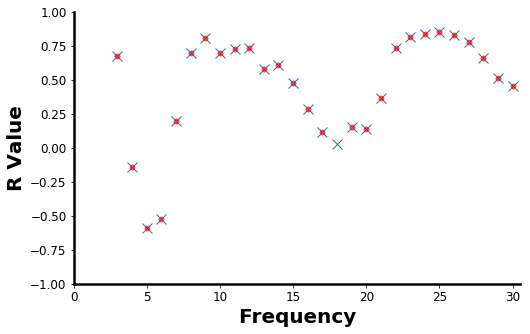

In [11]:
# Plot rolling frequency correlation
plot_freq_corr(fs, corr_vec, p_vec, save_out=True)

In [12]:
# Save out pickle file of current MegGroup() object
#save_obj_pickle(meg_group, 'Group_85_vertex_osc')